# CLASE 13 - Visualización con Matplotlib
#### Ejercicio práctico
----
## Actividad 2: Análisis de Ventas a lo Largo del Tiempo

### Objetivos:

* El objetivo es crear un gráfico de barras que permita visualizar fácilmente cuál fue el producto más vendido y cómo se comparan las ventas entre ellos.
* Este tipo de visualización es muy útil en ambientes de negocios para obtener insights de desempeño.


### Contexto:

* Luis, el Analista de BI, te pide que compares el rendimiento de cuatro productos durante una reciente campaña publicitaria. Este análisis es vital para evaluar los resultados de la campaña y decidir en qué productos enfocar esfuerzos futuros.

### Consigna:

1. Crear un gráfico que muestre las ventas por artículo.
2. Agregar el contexto al gráfico y buscar una forma de resaltar el artículo más vendido

### Dataset

```python
# Datos de ventas por producto
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D'] # Lista de los nombres de los productos

ventas = [300, 250, 400, 350] # Lista de las unidades vendidas de cada producto en la campaña.
```

---

* Primero importamos las librerías que vamos a usar: **Pandas** para manejar los datos y **Matplotlib** para graficar.
* Después cargamos los datos de productos y ventas en un **DataFrame**.
* Finalmente mostramos el contenido para verificar que todo esté correcto.


In [2]:
# Importamos las librerías necesarias
import pandas as pd
import matplotlib.pyplot as plt

# Datos de ventas por producto
productos = ['Producto A', 'Producto B', 'Producto C', 'Producto D']
ventas = [300, 250, 400, 350]

# Creamos un DataFrame de Pandas
df = pd.DataFrame({'Producto': productos, 'Ventas': ventas})

# Mostramos el DataFrame
df

,Producto,Ventas
0,Producto A,300
1,Producto B,250
2,Producto C,400
3,Producto D,350


### Cómo crear un gráfico de barras en Matplotlib

Para representar comparaciones entre categorías (como productos, ciudades o áreas de negocio), usamos el comando `plt.bar()`.

Su sintaxis básica es:

```python
plt.bar(x, height)
```

Donde:

* `x` son las etiquetas o categorías (por ejemplo, los nombres de los productos).
* `height` son los valores que queremos representar (por ejemplo, las ventas).

Podemos agregar otros elementos al gráfico, como se ve en la celda siguiente:


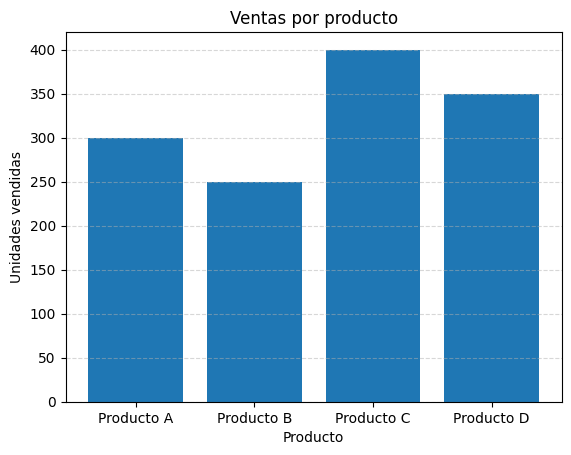

In [3]:
# Gráfico de barras simple
plt.bar(df["Producto"], df["Ventas"])   # eje X: productos, eje Y: ventas
plt.title("Ventas por producto")        # título del gráfico
plt.xlabel("Producto")                  # etiqueta del eje X
plt.ylabel("Unidades vendidas")         # etiqueta del eje Y

plt.grid(axis="y",
         linestyle="--",
         alpha=0.5
         )

plt.show()

`plt.bar()` dibuja una barra por cada categoría. En este caso, cada producto tiene una barra con altura proporcional a las unidades vendidas.
Agregamos un título y etiquetas para que sea más fácil interpretar el gráfico, y una cuadrícula horizontal para visualizar mejor las diferencias.



---

###  Mejora del gráfico de barras


* Usamos `idxmax()` para encontrar el producto con **mayor cantidad de ventas**.
* Creamos una lista de `colores` donde todos los productos se pintan de gris, excepto el más vendido, que se resalta en azul.
* Con el bucle `for`, agregamos una etiqueta con el número de ventas encima de cada barra.
* `edgecolor` y `linewidth` ayudan a que las barras tengan contornos más definidos.

> Este tipo de visualización resalta de inmediato cuál fue el producto con mejor desempeño.


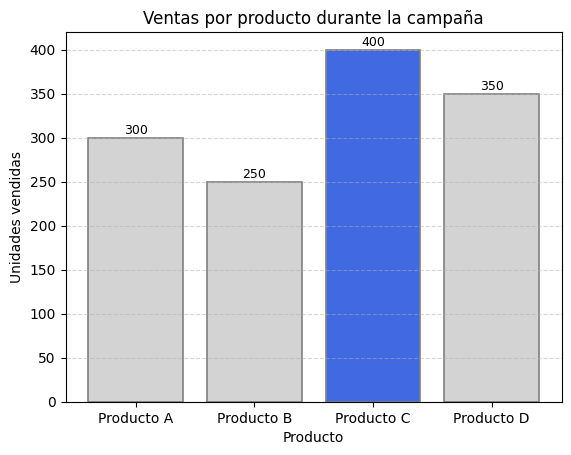

In [4]:
# Gráfico de barras con personalización y producto destacado

# Identificamos el producto más vendido
producto_top = df.loc[df["Ventas"].idxmax(), "Producto"]

# Colores: destacamos el producto con un color diferente
colores = ["lightgray" if p != producto_top else "royalblue" for p in df["Producto"]]

# Creamos el gráfico
plt.bar(df["Producto"],
        df["Ventas"],
        color=colores,
        edgecolor="gray",
        linewidth=1.2
        )

# Agregamos etiquetas de valor encima de cada barra
for i, valor in enumerate(df["Ventas"]):
    plt.text(i, valor + 5,
             str(valor),
             ha="center",
             fontsize=9,
             color="black"
             )

plt.title("Ventas por producto durante la campaña")
plt.xlabel("Producto")
plt.ylabel("Unidades vendidas")

plt.grid(axis="y",
         linestyle="--",
         alpha=0.5)
plt.show()

### Gráfico de barras horizontal

* `plt.barh()` crea un gráfico de barras **horizontal**, invirtiendo los ejes.

* Las etiquetas numéricas se ubican al final de cada barra (`valor + 5` para que no se superpongan).

* Es útil cuando hay **muchas categorías** o los nombres son largos, ya que mejora la legibilidad.


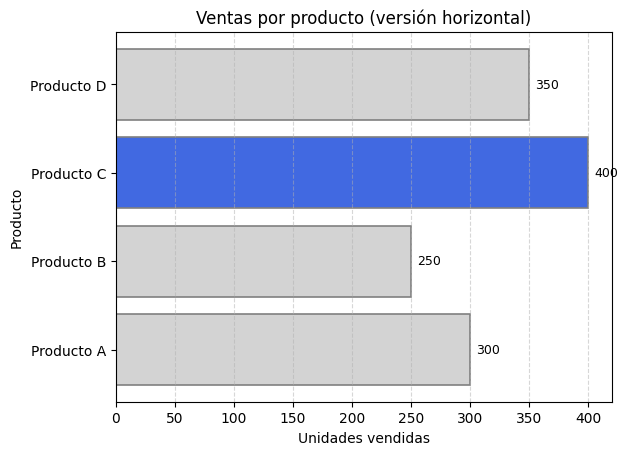

In [5]:
# Gráfico de barras horizontal

# Usamos el mismo esquema de colores de antes
colores = ["lightgray" if p != producto_top else "royalblue" for p in df["Producto"]]

plt.barh(df["Producto"], df["Ventas"], color=colores, edgecolor="gray", linewidth=1.2)

# Agregamos los valores al final de cada barra
for i, valor in enumerate(df["Ventas"]):
    plt.text(valor + 5, i,
             str(valor),
             va="center",
             fontsize=9,
             color="black"
             )

plt.title("Ventas por producto (versión horizontal)")
plt.xlabel("Unidades vendidas")
plt.ylabel("Producto")

plt.grid(axis="x",
         linestyle="--",
         alpha=0.5
         )

plt.show()

###  Gráfico con varias series y leyenda

* Creamos un nuevo dataset con tres trimestres de ventas para tres productos.

* Usamos `np.arange()` para generar las posiciones de cada grupo de barras.

* Dibujamos tres series de barras ligeramente desplazadas (`x - ancho`, `x`, `x + ancho`) para que queden **agrupadas**.

* `plt.legend()` agrega una leyenda que explica qué representa cada color.

* Este tipo de gráfico se usa mucho para **comparar evoluciones o resultados entre periodos**.





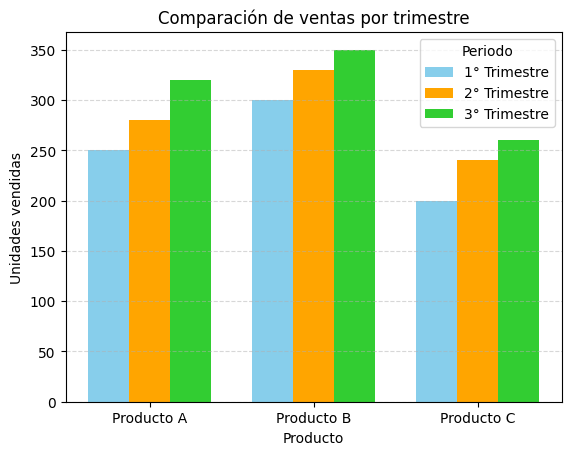

In [6]:
# Dataset nuevo: ventas trimestrales de tres productos
productos = ["Producto A", "Producto B", "Producto C"]
ventas_Q1 = [250, 300, 200]
ventas_Q2 = [280, 330, 240]
ventas_Q3 = [320, 350, 260]

# Creamos un DataFrame con los datos
df_multi = pd.DataFrame({
    "Producto": productos,
    "Q1": ventas_Q1,
    "Q2": ventas_Q2,
    "Q3": ventas_Q3
})

# Configuramos posición de las barras
import numpy as np
x = np.arange(len(df_multi["Producto"]))   # posiciones de los grupos
ancho = 0.25                               # ancho de cada barra

# Dibujamos las barras
plt.bar(x - ancho,
        df_multi["Q1"],
        width=ancho,
        label="1° Trimestre",
        color="skyblue"
        )
plt.bar(x,
        df_multi["Q2"],
        width=ancho,
        label="2° Trimestre",
        color="orange"
        )
plt.bar(x + ancho,
        df_multi["Q3"],
        width=ancho,
        label="3° Trimestre",
        color="limegreen"
        )

# Personalizamos el gráfico
plt.title("Comparación de ventas por trimestre")
plt.xlabel("Producto")
plt.ylabel("Unidades vendidas")
plt.xticks(x, df_multi["Producto"])        # reemplaza números por nombres
plt.legend(title="Periodo")                # muestra la leyenda con título
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()

### Análisis del codigo anterior, paso a paso:

---

### **1. Creación del dataset**

```python
productos = ["Producto A", "Producto B", "Producto C"]
ventas_Q1 = [250, 300, 200]
ventas_Q2 = [280, 330, 240]
ventas_Q3 = [320, 350, 260]
```

Simplemente creamos **listas de Python**:

* `productos` contiene los nombres de las categorías (en este caso, los tres productos).
* `ventas_Q1`, `ventas_Q2`, `ventas_Q3` son los valores correspondientes a cada producto en distintos trimestres.

---

### **2. Armado del DataFrame**

```python
df_multi = pd.DataFrame({
    "Producto": productos,
    "Q1": ventas_Q1,
    "Q2": ventas_Q2,
    "Q3": ventas_Q3
})
```

Creamos un **DataFrame** con Pandas, que organiza esos datos en formato de tabla:

| Producto   | Q1  | Q2  | Q3  |
| ---------- | --- | --- | --- |
| Producto A | 250 | 280 | 320 |
| Producto B | 300 | 330 | 350 |
| Producto C | 200 | 240 | 260 |

Esto facilita el acceso a cada columna, por ejemplo `df_multi["Q2"]`.

---

### **3. Configurar posiciones y ancho**

```python
import numpy as np
x = np.arange(len(df_multi["Producto"]))   # posiciones de los grupos
ancho = 0.25                               # ancho de cada barra
```

*  `np.arange(len(df_multi["Producto"]))` genera un arreglo de posiciones numéricas `[0, 1, 2]` —una para cada grupo de barras (cada producto).
* Estas posiciones serán el **centro de cada grupo**.
* Luego, `ancho` define cuánto espacio ocupa cada barra.
* Lo usamos para desplazar las barras horizontalmente y que no se superpongan.

---

### **4. Dibujar las tres series de barras**

```python
plt.bar(x - ancho, df_multi["Q1"], width=ancho, label="1° Trimestre", color="skyblue")
plt.bar(x, df_multi["Q2"], width=ancho, label="2° Trimestre", color="orange")
plt.bar(x + ancho, df_multi["Q3"], width=ancho, label="3° Trimestre", color="limegreen")
```

👉 Acá hacemos **tres llamadas a `plt.bar()`**, una por trimestre:

* `x - ancho` desplaza la primera barra un poco a la izquierda,
* `x` deja la segunda en el centro,
* `x + ancho` desplaza la tercera a la derecha.

Así logramos **barras agrupadas por producto**, en lugar de superpuestas.
Cada serie tiene su propio color y etiqueta (`label`) para la leyenda.

---

### **5. Personalización del gráfico**

```python
plt.title("Comparación de ventas por trimestre")
plt.xlabel("Producto")
plt.ylabel("Unidades vendidas")
plt.xticks(x, df_multi["Producto"])        # reemplaza números por nombres
plt.legend(title="Periodo")                # muestra la leyenda con título
plt.grid(axis="y", linestyle="--", alpha=0.5)
plt.show()
```

Esto es similar a lo visto en los otros gráficos:

* `plt.title`, `plt.xlabel`, `plt.ylabel`: agregan información textual.
* `plt.xticks(x, df_multi["Producto"])` reemplaza los valores `[0, 1, 2]` del eje X por los nombres de los productos.
* `plt.legend(title="Periodo")` agrega una leyenda para distinguir los colores (uno por trimestre).
* `plt.grid(axis="y")` agrega líneas horizontales suaves para facilitar la lectura.
* Finalmente, `plt.show()` dibuja todo en pantalla.
